# Работа с Pandas

Булыгин Олег  
 
* [LinkedIn](linkedin.com/in/obulygin)  
* [Мой ТГ канал по Python](https://t.me/solidtalk)

## План
В рамках воркфлоу работы с открытым датафреймом по реальным транзакциям британского онлайн-магазина подарков. Реализуем набор аналитических действий и решим задачи:
- посчитаем статистику по странам;
- проанализируем выручку;
- изучим статистику по клиентам;
- проанализируем динамику среднего чека;
- просегментируем товары по стоимости;
- сделаем когортный анализ и анализ удержания клиентов (уже непросто!).

Пройдя по этим шагам повторим:
- базовую работу с датами;
- преобразование типов;
- сортировку;
- группировку и сводные таблицы;
- объединение датафреймов.

In [ ]:
# импортируем pandas
import pandas as pd

### Открытие и знакомство с данными

In [ ]:
# читаем данные из csv, который находится в zip-файле на github
url = 'https://github.com/obulygin/SkillFactory/blob/main/ecommerce-data.zip?raw=true'
df = pd.read_csv(url, encoding='ISO-8859-1', compression='zip')

In [ ]:
# смотрим первые 5 строк таблицы
display(df.head())
# смотрим последние 5 строк таблицы
display(df.tail())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [ ]:
# рассчитываем базовые статистики по каждому числовому признаку
df.describe() 

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Избавимся от отрицательных значений

In [ ]:
# оставляем данные только с положительными ценами на товар и количеством
df = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


### Избавимся от дубликатов в данных

In [ ]:
# посмотрим, сколько у нас повторов
print(df.duplicated().sum())

5226


In [ ]:
# сколько всего строк?
print(df.shape)

(524878, 8)


In [ ]:
# удалим дубли и проверим
df.drop_duplicates(inplace=True)
print(df.shape)

(524878, 8)


In [ ]:
print(df.duplicated().sum())

0


### Поправим типы данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524878 non-null  object 
 1   StockCode    524878 non-null  object 
 2   Description  524878 non-null  object 
 3   Quantity     524878 non-null  int64  
 4   InvoiceDate  524878 non-null  object 
 5   UnitPrice    524878 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      524878 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.0+ MB


In [ ]:
# почему ошибка?
df['CustomerID'] = df['CustomerID'].astype('int64')

IntCastingNaNError: ignored

In [ ]:
# Nullable datatypes: https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html
df['CustomerID'] = df['CustomerID'].astype('Int64')

In [ ]:
# переведем даты из строкового формата в datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   392692 non-null  Int64         
 7   Country      524878 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 36.5+ MB


### Изучаем статистику по странам

In [ ]:
# считаем сколько транзакций было по странам при помощи value_counts
df['Country'].value_counts()

United Kingdom          479985
Germany                   9025
France                    8392
EIRE                      7879
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1958
Portugal                  1492
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon 

In [ ]:
# считаем сколько уникальных клиентов в странах
countries = df.groupby('Country')[['CustomerID']].nunique().sort_values(by='CustomerID')
countries

,CustomerID
Country,
Hong Kong,0
Brazil,1
Singapore,1
Saudi Arabia,1
RSA,1
Czech Republic,1
European Community,1
Lithuania,1
Lebanon,1


#### Практика. Определяем топ-5 лояльных клиентов по количеству покупок

In [ ]:
df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head()

CustomerID
12748    209
14911    201
17841    124
13089     97
14606     93
Name: InvoiceNo, dtype: int64

### Создадим временные признакми

In [ ]:
# добавим месяц покупки в новый столбец при помощи dt.strftime('%Y - %m')
df['InvoiceMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m') 
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12


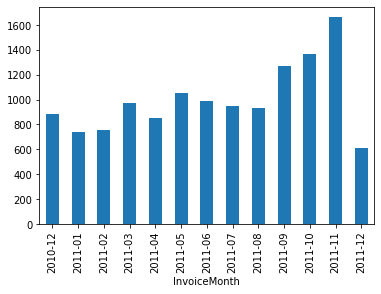

In [ ]:
# уникальные покупатели по месяцам
df.groupby('InvoiceMonth')['CustomerID'].nunique().plot(kind='bar')

In [ ]:
# зафиксируем дни недели
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek + 1
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,3
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12,5


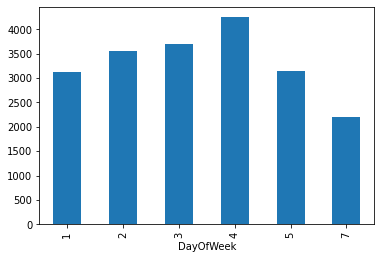

In [ ]:
# посчитаем количество заказов по дням недели
df.groupby('DayOfWeek')['InvoiceNo'].nunique().plot(kind='bar')


#### Практика. Изучим динамику количества покупок по часам

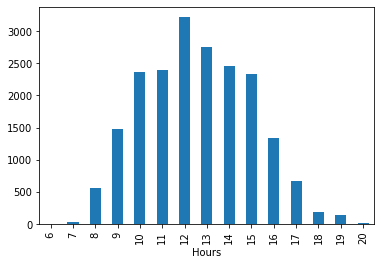

In [ ]:
df['Hours'] = df['InvoiceDate'].dt.hour
df.groupby('Hours')['InvoiceNo'].nunique().plot(kind='bar') 

### Посчитаем выручку

In [ ]:
# создадим новый столбец
df['Revenue'] = df['Quantity'] * df['UnitPrice']

df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,DayOfWeek,Hours,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,3,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,3,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,3,8,20.34


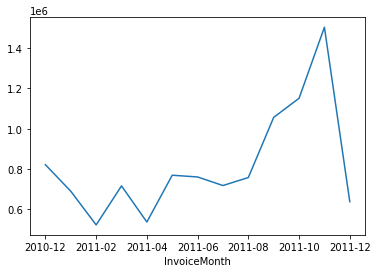

In [ ]:
# выручка по месяцам
df.groupby('InvoiceMonth')['Revenue'].sum().plot()

#### Практика. Найдите 3 страны, которые принесли максимальную выручку после UK

In [ ]:
df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)[1:4]

Country
Netherlands    285446.34
EIRE           283140.52
Germany        228678.40
Name: Revenue, dtype: float64

### Сегменты товаров по стоимости

In [ ]:
# напишем функцию для сегментации товаров
def price_segment(row):
    if row < 5:
        return 'cheap' 
    elif 5 <= row < 25:
        return 'lower-middle'
    elif 25 <= row < 100:
        return 'upper-middle'
    elif row >= 100:
        return 'expensive'
 

df['PriceSegment'] = df['UnitPrice'].apply(price_segment)
df.groupby('PriceSegment')['StockCode'].nunique()

PriceSegment
cheap           3425
expensive         14
lower-middle    1530
upper-middle      97
Name: StockCode, dtype: int64

#### Практика. Определить, какая из категорий товаров принесла больше всего выручки

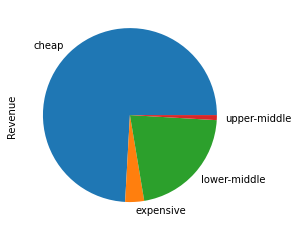

In [ ]:
df.groupby('PriceSegment')['Revenue'].sum().plot(kind='pie')

### Как меняется средний чек со временем?

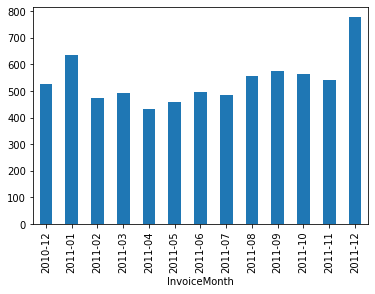

In [ ]:
df.groupby('InvoiceMonth')['Revenue'].sum().divide(df.groupby('InvoiceMonth')['InvoiceNo'].nunique()).plot(kind='bar')

### Построим сводные таблицы

In [ ]:
# сводная таблица по выручки в определенной стране в разрезе клиентов и месяцев
country = 'France'
table = pd.pivot_table(
    df[df['Country']==country], 
    index='CustomerID', 
    columns='InvoiceMonth', 
    aggfunc='sum', 
    values='Revenue', 
    fill_value=0)


# подсветить максимальные значения по каждому месяцу
# table
table.style.highlight_max()
table.style.background_gradient(cmap='PuBu')

InvoiceMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CustomerID,,,,,,,,,,,,,
12413,0.000000,479.250000,0.000000,0.000000,84.650000,0.000000,0.000000,0.000000,0.000000,0.000000,194.200000,0.000000,0.000000
12437,0.000000,392.700000,590.260000,147.710000,209.100000,635.320000,501.640000,0.000000,0.000000,557.280000,263.460000,1488.040000,165.900000
12441,173.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,553.390000,214.060000,531.210000,0.000000
12489,0.000000,334.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12490,0.000000,864.220000,0.000000,0.000000,0.000000,331.500000,484.060000,412.930000,424.060000,1035.820000,0.000000,1403.040000,462.300000
12491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,460.400000,0.000000
12493,0.000000,0.000000,0.000000,0.000000,0.000000,232.500000,201.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12494,62.550000,0.000000,250.000000,0.000000,0.000000,403.090000,0.000000,153.220000,0.000000,0.000000,214.740000,162.500000,0.000000


#### Практика. Построить сводную таблицу c кол-вом заказов по странам и месяцам


In [ ]:
pd.pivot_table(df, index='Country', columns='InvoiceMonth', aggfunc='nunique', values='InvoiceNo', fill_value=0) 

InvoiceMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
Country,,,,,,,,,,,,,
Australia,3,9,5,3,2,4,4,7,2,8,4,6,0
Austria,1,0,2,2,2,2,0,2,2,0,1,2,1
Bahrain,1,0,0,0,0,2,0,0,0,0,0,0,0
Belgium,5,3,8,9,6,9,11,5,9,7,11,11,4
Brazil,0,0,0,0,1,0,0,0,0,0,0,0,0
Canada,0,0,0,1,0,1,1,2,1,0,0,0,0
Channel Islands,1,1,1,3,1,2,1,0,5,2,5,3,1
Cyprus,1,1,6,1,0,0,1,0,0,1,4,1,0
Czech Republic,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
# изучим сводную статистику по покупателям из произвольной страны (суммарная и средняя выручка)
products = df[df['Country']==country].groupby(['CustomerID', 'InvoiceNo'], as_index=False)['Revenue'].sum()
# display(products)
products = products.groupby('CustomerID').agg({'InvoiceNo': ['count'], 'Revenue': ['sum','mean']})
display(products)

InvoiceNo  Revenue             
               count      sum         mean
CustomerID                                
12413              3   758.10   252.700000
12437             18  4951.41   275.078333
12441              1   173.55   173.550000
12488              3  1298.66   432.886667
12489              1   334.93   334.930000
...              ...      ...          ...
12734              1   110.40   110.400000
12735              2   779.57   389.785000
12736              1   234.00   234.000000
12740              1   427.60   427.600000
14277              3  4188.00  1396.000000

[87 rows x 3 columns]

In [ ]:
# объединяем статистику по месяцам и статистику по выручки и количеству заказов в разрезе пользователей
table_plus = pd.merge(table, products, on='CustomerID') 
table_plus.style.highlight_max()
# table_plus.style.background_gradient(cmap='PuBu')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  


,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,"('InvoiceNo', 'count')","('Revenue', 'sum')","('Revenue', 'mean')"
CustomerID,,,,,,,,,,,,,,,,
12413,0.000000,479.250000,0.000000,0.000000,84.650000,0.000000,0.000000,0.000000,0.000000,0.000000,194.200000,0.000000,0.000000,3,758.100000,252.700000
12437,0.000000,392.700000,590.260000,147.710000,209.100000,635.320000,501.640000,0.000000,0.000000,557.280000,263.460000,1488.040000,165.900000,18,4951.410000,275.078333
12441,173.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,173.550000,173.550000
12488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,553.390000,214.060000,531.210000,0.000000,3,1298.660000,432.886667
12489,0.000000,334.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,334.930000,334.930000
12490,0.000000,864.220000,0.000000,0.000000,0.000000,331.500000,484.060000,412.930000,424.060000,1035.820000,0.000000,1403.040000,462.300000,10,5417.930000,541.793000
12491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,460.400000,0.000000,1,460.400000,460.400000
12493,0.000000,0.000000,0.000000,0.000000,0.000000,232.500000,201.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,433.740000,216.870000
12494,62.550000,0.000000,250.000000,0.000000,0.000000,403.090000,0.000000,153.220000,0.000000,0.000000,214.740000,162.500000,0.000000,7,1246.100000,178.014286


### Когортный анализ

Идея когортного анализа состоит в том, чтобы резделить пользоватей на группы по определенным признакам, и отслеживать поведение этих групп во времени. Обычно группы пользователей (когорты) выделяют на основе недели (месяца), когда пользователи совершили первую покупку.

Выделив такие группы пользователей (когорты), вы следите за ними в течение времени и измеряете ключевые метрики для каждой отдельной когорты.

In [ ]:
# определяем месяц первой покупки для каждого покупателя 
cohorts = df.groupby('CustomerID', as_index=False)['InvoiceMonth'].min()
cohorts.rename(columns = {'InvoiceMonth':'Cohort'}, inplace=True)
cohorts.head()

,CustomerID,Cohort
0,12346,2011-01
1,12347,2010-12
2,12348,2010-12
3,12349,2011-11
4,12350,2011-02


In [ ]:
# добавим когорты к основным данным

# исключаем пропуски по пользователям для корректного объединения
df_merged = pd.merge(df.dropna(), cohorts, how='left', on='CustomerID')
df_merged.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,DayOfWeek,Hours,Revenue,PriceSegment,Cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,3,8,15.30,cheap,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,3,8,20.34,cheap,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,3,8,22.00,cheap,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,3,8,20.34,cheap,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,3,8,20.34,cheap,2010-12


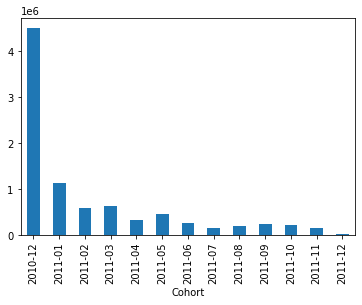

In [ ]:
# считаем доходы по когортам
df_merged.groupby('Cohort')['Revenue'].sum().plot(kind='bar')

### Анализ retention

Customer retention (удержание клиентов) — это способность компании удерживать своих потребителей в течение определенного периода времени.

In [ ]:
import numpy as np

# пишем функцию которая добавляет столбец с временем жизни каждой когорты
def cohort_period(df):
  df['CohortLT'] = np.arange(len(df))
  return df

# считаем сколько уникальных клиентов у нас в каждой когорте
cohorts = df_merged.groupby(['Cohort', 'InvoiceMonth'])[['CustomerID']].nunique()
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.rename({'CustomerID': 'TotalUsers'}, inplace=True)
cohorts

CustomerID  CohortLT
Cohort  InvoiceMonth                      
2010-12 2010-12              885         0
        2011-01              324         1
        2011-02              286         2
        2011-03              340         3
        2011-04              321         4
...                          ...       ...
2011-10 2011-11               86         1
        2011-12               41         2
2011-11 2011-11              323         0
        2011-12               36         1
2011-12 2011-12               41         0

[91 rows x 2 columns]

In [ ]:
# переведем когорты в индекс, а дату чека в столбец
cohorts.reset_index(inplace=True)
cohorts.set_index(['Cohort', 'CohortLT'], inplace=True) 
cohorts = cohorts.rename(columns={'CustomerID': 'TotalUsers'})
cohorts

InvoiceMonth  TotalUsers
Cohort  CohortLT                         
2010-12 0             2010-12         885
        1             2011-01         324
        2             2011-02         286
        3             2011-03         340
        4             2011-04         321
...                       ...         ...
2011-10 1             2011-11          86
        2             2011-12          41
2011-11 0             2011-11         323
        1             2011-12          36
2011-12 0             2011-12          41

[91 rows x 2 columns]

In [ ]:
# считаем ретеншн пользователей в каждой когорте

# определим количество покупок в первый месяц когорты (100%)
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size


Cohort
2010-12    885
2011-01    417
2011-02    380
2011-03    452
2011-04    300
2011-05    284
2011-06    242
2011-07    188
2011-08    169
2011-09    299
2011-10    358
2011-11    323
2011-12     41
Name: TotalUsers, dtype: int64

In [ ]:
# узнаем какой процент покупок этой когортой совершался в последующие месяца
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention

Cohort,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortLT,,,,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1,0.366102,0.220624,0.186842,0.150442,0.213333,0.190141,0.173554,0.180851,0.207101,0.234114,0.240223,0.111455,NaN
2,0.323164,0.266187,0.186842,0.252212,0.203333,0.172535,0.157025,0.207447,0.248521,0.301003,0.114525,NaN,NaN
3,0.384181,0.230216,0.284211,0.199115,0.210000,0.172535,0.264463,0.223404,0.242604,0.113712,NaN,NaN,NaN
4,0.362712,0.321343,0.271053,0.223451,0.196667,0.207746,0.231405,0.271277,0.124260,NaN,NaN,NaN,NaN
5,0.397740,0.287770,0.247368,0.168142,0.226667,0.232394,0.334711,0.111702,NaN,NaN,NaN,NaN,NaN
6,0.362712,0.247002,0.252632,0.267699,0.216667,0.264085,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
7,0.349153,0.242206,0.278947,0.230088,0.260000,0.095070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.353672,0.299760,0.247368,0.278761,0.073333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


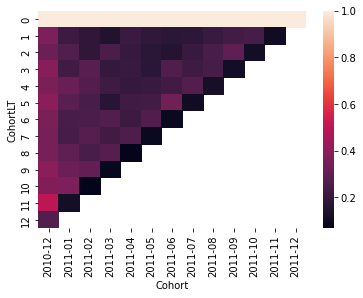

In [ ]:
import seaborn as sns

sns.heatmap(user_retention)

**Спасибо за внимание буду рад ответить на ваши вопросы!**  
Ссылка на форму ОС:
https://forms.gle/y8xaFwJqtbFSjUeG8